In [89]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers as l
from tensorflow.keras import models

import matplotlib.pyplot as plt

In [36]:
model = models.Sequential()
model.add(l.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(l.MaxPooling2D((2, 2)))
model.add(l.Conv2D(64, (3, 3), activation='relu'))
model.add(l.MaxPooling2D((2, 2)))
model.add(l.Conv2D(64, (3, 3), activation='relu'))
model.add(l.Flatten())
model.add(l.Dense(64, activation='relu'))
model.add(l.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
len(train_images)

60000

In [20]:
len(train_images[0])

28

In [30]:
len(train_images[0][0])

28

In [39]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [32]:
len(test_images)

10000

In [40]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [41]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [42]:
model.compile(
    optimizer='rmsprop'
    , loss='categorical_crossentropy'
    , metrics=['accuracy']
)

hist = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 314us/sample - loss: 0.1724 - accuracy: 0.9456

In [46]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

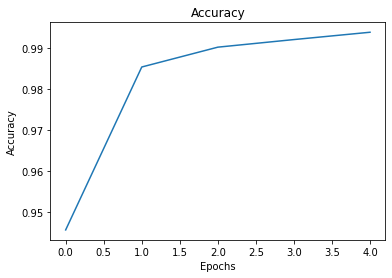

In [51]:
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

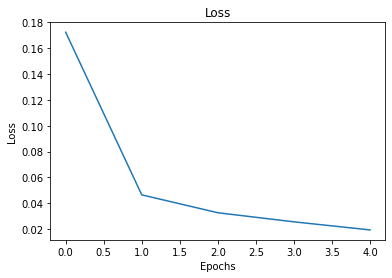

In [52]:
plt.clf()
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [53]:
_, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.0300 - accuracy: 0.9907

In [55]:
print(f'Accuracy: {test_acc * 100}%')

Accuracy: 99.07000064849854%


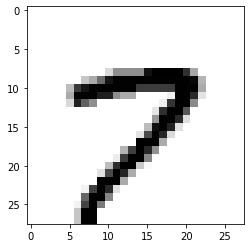

In [60]:
image = train_images[123]
graph_image = image.reshape(28, 28)
plt.imshow(graph_image, cmap='gray_r')
plt.show()

In [81]:
import numpy as np
copy_image = np.expand_dims(image, axis=0)
prediction = model.predict(copy_image)

In [88]:
pred = np.argmax(prediction, axis=1)
print(f'Model has predicted: {pred[0]}!')

Model has predicted: 7!
